In [41]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

from utils.synthesis import make_c2w
from utils.utils import visualize_blur_trajectories

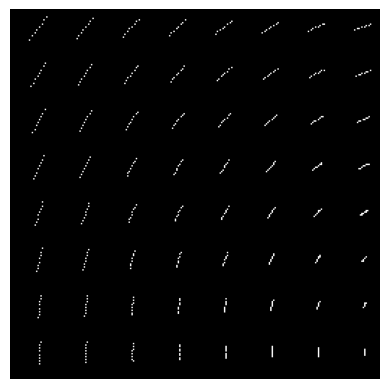

In [86]:
# blur trajectory visulization

def randn_vector_linspace(num_poses):
    start, end = torch.randn(3), torch.randn(3)
    return torch.stack([torch.linspace(start[i], end[i], num_poses) for i in range(3)], dim=1)

num_poses = 8

r = randn_vector_linspace(num_poses) * 0.05
t = randn_vector_linspace(num_poses)

grid_2d_rigid = F.affine_grid(
    make_c2w(r, t)[:, :2, :3], 
    [num_poses, 3, 256, 256], # image must be square for circular motion pattern
    align_corners=True
)
img = visualize_blur_trajectories(grid_2d_rigid, grid_spacing=32, colormap=None)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()